In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
x = pd.read_csv('heart.csv')
df = pd.DataFrame(x)
df.head()
# age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.columns[df.isnull().any()]

Index([], dtype='object')

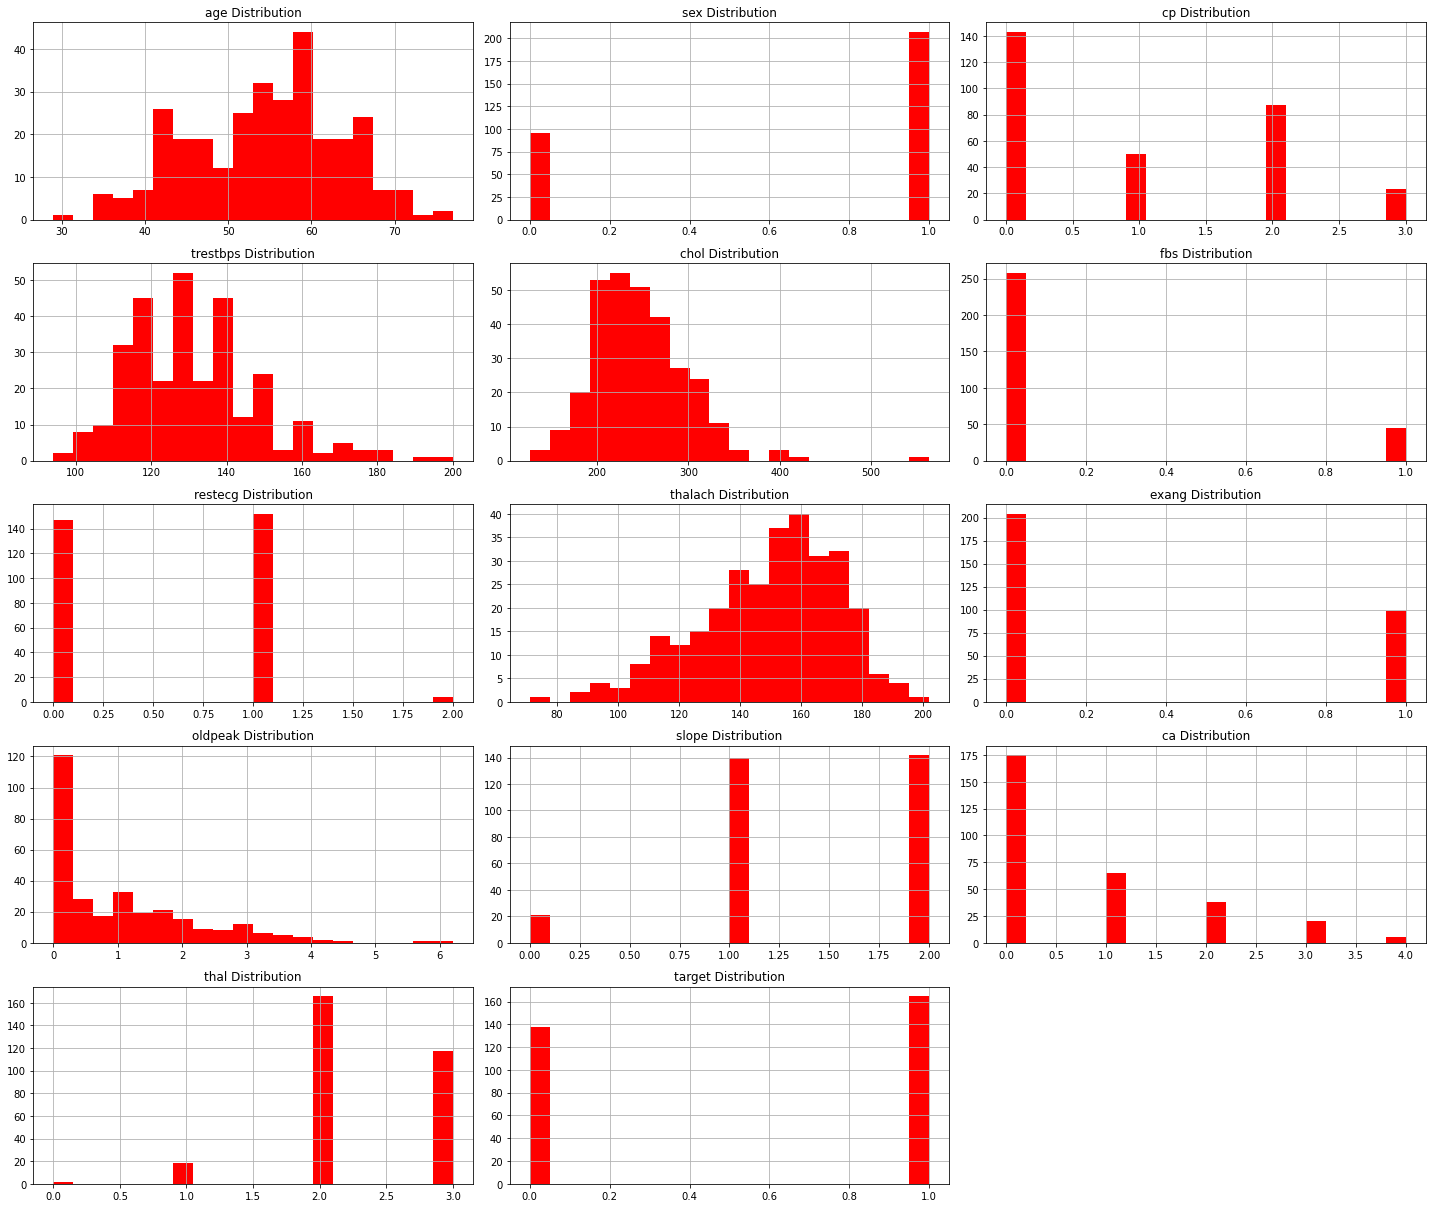

In [9]:
# Exploratory Analysis
def EA(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+" Distribution",color='black')
    fig.tight_layout()  
    plt.show()
EA(df,df.columns,6,3)

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

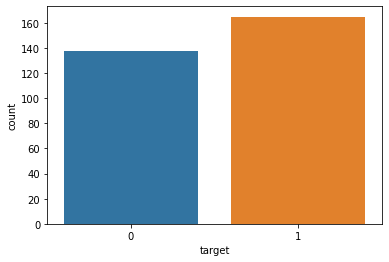

In [11]:
sns.countplot(x='target',data=df)
# There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [13]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

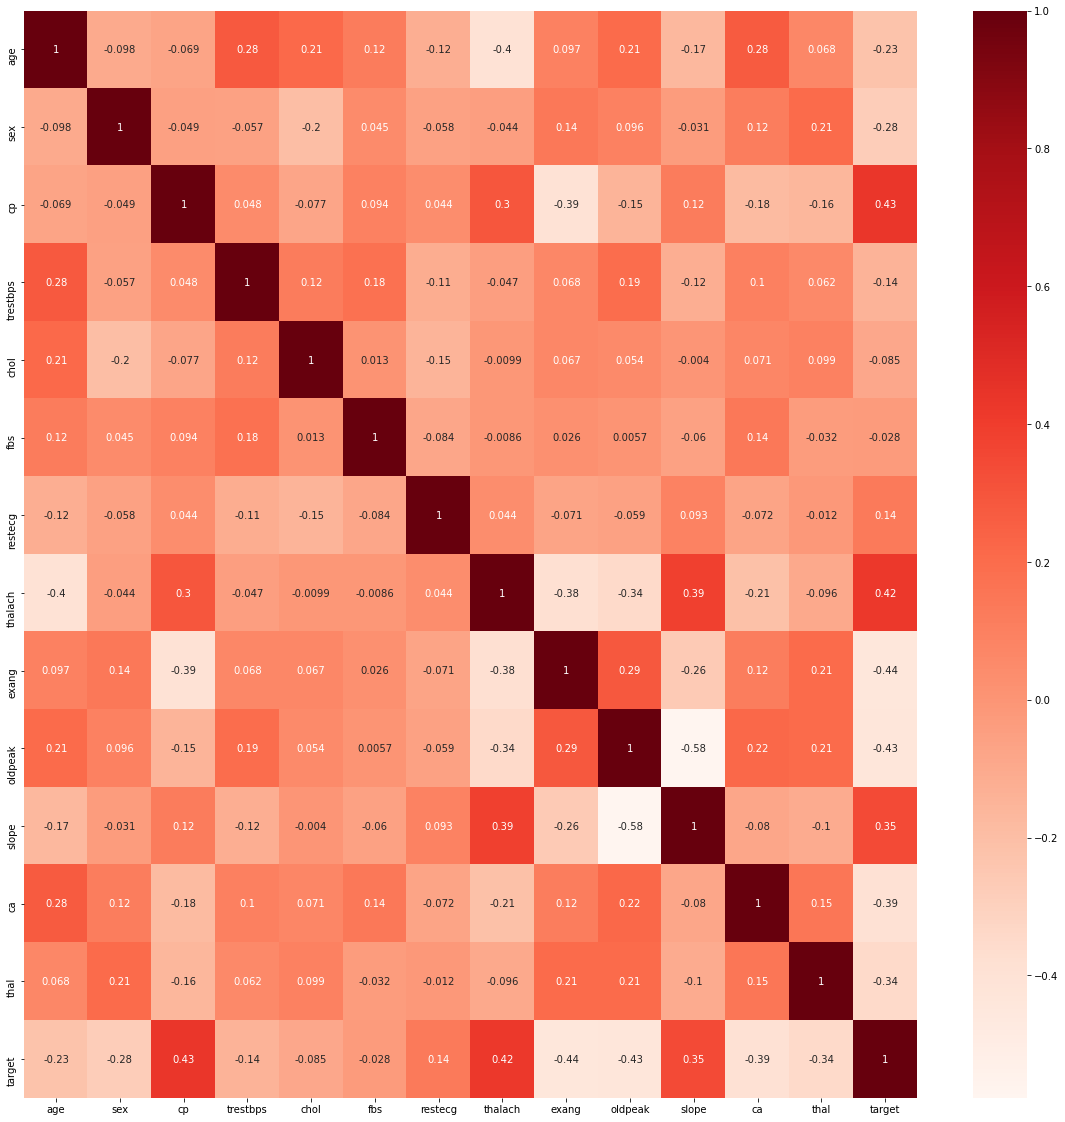

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
breast_cancer_corr = x.corr()
sns.heatmap(breast_cancer_corr, annot=True, cmap=plt.cm.Reds)
# plt.savefig('E:\Heatmap.png', dpi=1000)
plt.show()

In [15]:
high_correlation = breast_cancer_corr.abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
print(high_correlation_sort)
print("=============================================================================")
for i in range(len(high_correlation_sort)):
    if high_correlation_sort[i]>=0.50 and high_correlation_sort[i]<1:
        print(i)
print("=============================================================================")


target    target      1.000000
thal      thal        1.000000
sex       sex         1.000000
cp        cp          1.000000
trestbps  trestbps    1.000000
                        ...   
thalach   fbs         0.008567
fbs       oldpeak     0.005747
oldpeak   fbs         0.005747
slope     chol        0.004038
chol      slope       0.004038
Length: 196, dtype: float64
14
15


In [16]:
print(high_correlation_sort[16:25])
print("=============================================================================")

exang    target     0.436757
target   exang      0.436757
         cp         0.433798
cp       target     0.433798
target   oldpeak    0.430696
oldpeak  target     0.430696
thalach  target     0.421741
target   thalach    0.421741
thalach  age        0.398522
dtype: float64


In [17]:
final_features = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]

In [18]:
a = list(final_features.columns)

In [19]:
a

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(final_features.drop('target', axis=1), final_features['target'], test_size = 0.30, random_state=5)

In [21]:
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape) 

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
type(y_train)

pandas.core.series.Series

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
logmodel = LogisticRegression(max_iter=200, C=100)

In [26]:
logmodel.fit(X_train, y_train)

C:\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, max_iter=200)

In [27]:
prediction = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

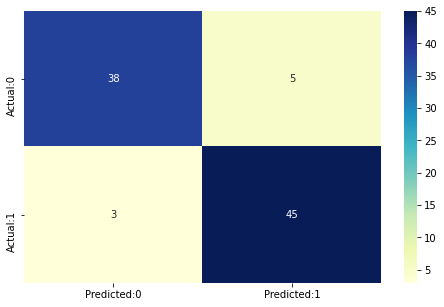

In [29]:
cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [30]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [31]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9120879120879121 
 The Missclassification = 1-Accuracy =  0.08791208791208793 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9375 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8837209302325582 
 Positive Predictive value = TP/(TP+FP) =  0.9 
 Negative predictive Value = TN/(TN+FN) =  0.926829268292683 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  8.062500000000002 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07072368421052631


In [32]:
print(X_test)
print('===================')
print(y_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
302   57    0   1       130   236    0        0      174      0      0.0   
243   57    1   0       152   274    0        1       88      1      1.2   
268   54    1   0       122   286    0        0      116      1      3.2   
213   61    0   0       145   307    0        0      146      1      1.0   
24    40    1   3       140   199    0        1      178      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
247   66    1   1       160   246    0        1      120      1      0.0   
240   70    1   2       160   269    0        1      112      1      2.9   
2     41    0   1       130   204    0        0      172      0      1.4   
264   54    1   0       110   206    0        0      108      1      0.0   
23    61    1   2       150   243    1        1      137      1      1.0   

     slope  ca  thal  
302      1   1     2  
243      1   1     3  
268      1   2    

In [33]:
y_pred_prob=logmodel.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.085564,0.914436
1,0.994812,0.005188
2,0.994497,0.005503
3,0.825149,0.174851
4,0.191152,0.808848


In [34]:
y_pred_prob_df

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.085564,0.914436
1,0.994812,0.005188
2,0.994497,0.005503
3,0.825149,0.174851
4,0.191152,0.808848
...,...,...
86,0.909012,0.090988
87,0.969600,0.030400
88,0.062069,0.937931
89,0.949825,0.050175


In [35]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logmodel.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[27 16]
 [ 1 47]] 
 with 74 correct predictions and 1 Type II errors( False Negatives) 

 Sensitivity:  0.9791666666666666 Specificity:  0.627906976744186 



With 0.2 threshold the Confusion Matrix is  
 [[33 10]
 [ 2 46]] 
 with 79 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9583333333333334 Specificity:  0.7674418604651163 



With 0.3 threshold the Confusion Matrix is  
 [[37  6]
 [ 2 46]] 
 with 83 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9583333333333334 Specificity:  0.8604651162790697 



With 0.4 threshold the Confusion Matrix is  
 [[38  5]
 [ 2 46]] 
 with 84 correct predictions and 2 Type II errors( False Negatives) 

 Sensitivity:  0.9583333333333334 Specificity:  0.8837209302325582 





C:\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\anaconda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  

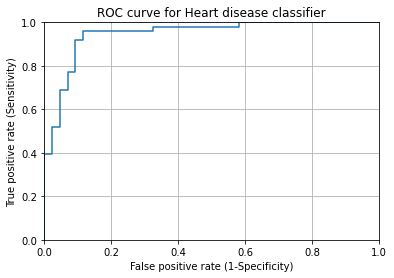

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9462209302325582

In [38]:
import joblib

In [39]:
final_module = 'Final_finalized_model12345.sav'

In [40]:
joblib.dump(logmodel, final_module)

['Final_finalized_model12345.sav']

In [41]:
load_module = joblib.load(final_module)

In [42]:
result = load_module.score(X_test, y_test)

In [43]:
result

0.9120879120879121

In [44]:
final_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
# 'male','sysBP','diaBP','cigsPerDay','currentSmoker','prevalentHyp','diabetes','glucose','TenYearCHD'
x = [57,1,0,130,131,0,1,115,1,1.2,1,1,3]

In [56]:
np.array(x)

array([ 57. ,   1. ,   0. , 130. , 131. ,   0. ,   1. , 115. ,   1. ,
         1.2,   1. ,   1. ,   3. ])

In [50]:
a = np.array(x).reshape(-1, 13)

In [61]:

y_test

302    0
243    0
268    0
213    0
24     1
      ..
247    0
240    0
2      1
264    0
23     1
Name: target, Length: 91, dtype: int64

In [57]:
logmodel.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [52]:
load_module.predict(a)

array([0], dtype=int64)